<a href="https://colab.research.google.com/github/TirsitEndeshaw/Data-Analysis-projects/blob/main/App_Rating_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import libraries such as Pandas, matplotlib, NumPy, and seaborn and load the insurance dataset

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
pd.read_csv("/content/drive/MyDrive/googleplaystore.csv")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [29]:
data = pd.read_csv("/content/drive/MyDrive/googleplaystore.csv")

# Clean and preprocess the Installs column
# Remove commas and '+' symbols, and filter out non-numeric rows

In [31]:
data['Installs'] = (
    data['Installs']
    .str.replace(',', '', regex=True)
    .str.replace(r'\+', '', regex=True)
)

# Keep only rows where 'Installs' is numeric

In [32]:
data = data[data['Installs'].str.isnumeric()]

# Convert the Installs column to integers

In [33]:
data['Installs'] = data['Installs'].astype(int)

# Filter rows where the Installs column is greater than 5,000,000

In [43]:
filtered_data = data[data['Installs'] > 5000000]

# Save the filtered data to a new CSV file (optional)

In [44]:
filtered_data.to_csv("filtered_googleplaystore.csv", index=False)

# Display the filtered DataFrame

In [45]:
print(filtered_data)

                                                     App            Category  \
3                                  Sketch - Draw & Paint      ART_AND_DESIGN   
12                        Tattoo Name On My Photo Editor      ART_AND_DESIGN   
19                                          ibis Paint X      ART_AND_DESIGN   
42                            Textgram - write on photos      ART_AND_DESIGN   
45     Canva: Poster, banner, card maker & graphic de...      ART_AND_DESIGN   
...                                                  ...                 ...   
10729                            MX Player Codec (ARMv7)  LIBRARIES_AND_DEMO   
10740                                         PhotoFunia         PHOTOGRAPHY   
10781                               Modern Strike Online                GAME   
10784                                         Big Hunter                GAME   
10840      iHoroscope - 2018 Daily Horoscope & Astrology           LIFESTYLE   

       Rating Reviews                Si

# Define a function to categorize Installs into groups


In [46]:
def categorize_Installs(value):
    if 1 <= value <= 1_000_000:
        return "1-1,000,000"
    elif 1_000_001 <= value <= 10_000_000:
        return "1,000,001-10,000,000"
    elif 10_000_001 <= value <= 100_000_000:
        return "10,000,001-100,000,000"
    elif 100_000_001 <= value <= 1_000_000_000:
        return "100,000,001-1,000,000,000"
    else:
        return "1,000,000,001+"

# Apply the categorization function to the 'Installs' column

In [50]:
data['Installs_Group'] = data['Installs'].apply(categorize_Installs)

# Group the data by the Download_Group and count the number of rows in each group

In [51]:
grouped_data = data.groupby('Installs_Group').size().reset_index(name='Count')

# Display the grouped data

In [52]:
print(grouped_data)

              Installs_Group  Count
0             1,000,000,001+     15
1       1,000,001-10,000,000   2004
2                1-1,000,000   7993
3     10,000,001-100,000,000    698
4  100,000,001-1,000,000,000    130


This grouping helps in understanding the distribution of apps based on their popularity or reach, as measured by the number of downloads.

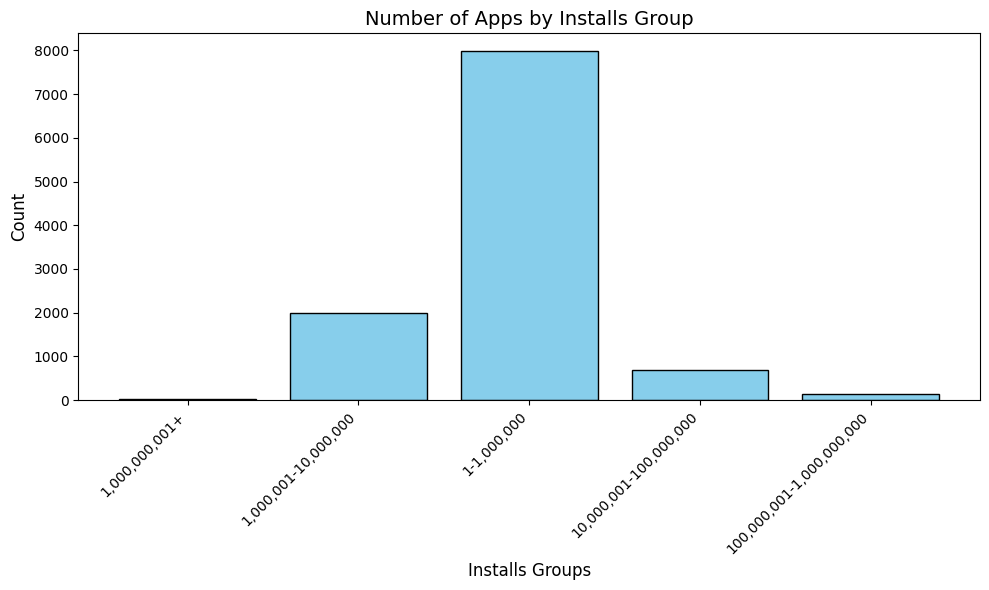

In [65]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(grouped_data['Installs_Group'], grouped_data['Count'], color='skyblue', edgecolor='black')
plt.xlabel('Installs Groups', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Apps by Installs Group', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Then number of installs for about 8000 apps is under a million arout 2000 apps have 1-10 million installs

In [58]:
bins_rating = [0, 2, 3.5,4, 5]
labels_rating = ['0-2', '2.1-3.5', '3.6-4.5', '4.6-5']
data['Rating_Group'] = pd.cut(data['Rating'], bins=bins_rating, labels=labels_rating, right=True)
grouped_by_rating = data.groupby('Rating_Group').size().reset_index(name='Count')
print(grouped_by_rating)

  Rating_Group  Count
0          0-2     68
1      2.1-3.5    828
2      3.6-4.5   1670
3        4.6-5   6800


<ipython-input-58-e3acdd18e922>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_rating = data.groupby('Rating_Group').size().reset_index(name='Count')


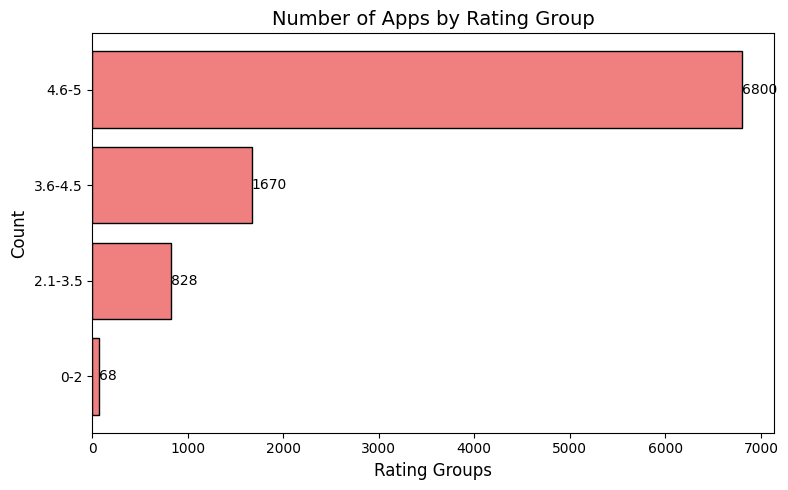

In [63]:
plt.figure(figsize=(8, 5))
bars = plt.barh(grouped_by_rating['Rating_Group'], grouped_by_rating['Count'], color='lightcoral', edgecolor='black')
plt.xlabel('Rating Groups', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Apps by Rating Group', fontsize=14)
for bar in bars:
    xval = bar.get_width()  # Get the width of each bar (i.e., the count)
    plt.text(xval + 0.1, bar.get_y() + bar.get_height()/2, str(xval), ha='left', va='center', fontsize=10)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

This grouping helps in understanding the distribution of app ratings, with the majority of apps having high ratings (4.6-5), and a smaller number of apps with lower ratings. It gives an insight into the overall app quality across different rating ranges.